In [ ]:
'''
T test is similar to z test but for smaller sample sizes i.e sample size less than 30. Conditions include
    sample size lessthan 30
    standard deviation of population is not known

note below  in exhibit 1, that for dof greater than 30, t test follows normal distribnution only 
hypothesis testing can be done directly using ttest_1samp. This calculates dof in itself


T test is also used to compare 2 seperate samples if they are statistically different
hypothesis testing can be done directly using ttest_ind. This calculates dof in itself as well. ind stands for independent
    3 types of tests are there - less, greater, 2 sided
        two-sided: different in either direction
        greater: right tailed test
        less: left tailed test
note = If a one-sided test (either "greater" or "less") rejects the null hypothesis at significance level alpha 
    then the two-sided test will also reject the null at significance level 2*alpha(because the two-sided test splits the significance level between both tails).
'''

In [28]:
import numpy as np 
from scipy.stats import norm, t, ttest_1samp,ttest_ind
import seaborn as sns
import pandas as pd


# Exhibit 1

<Axes: >

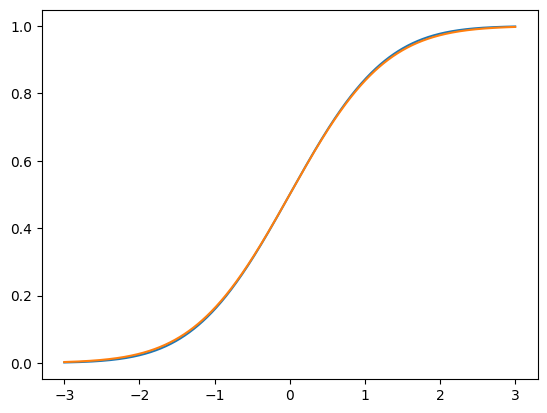

In [ ]:
x_values = np.linspace(-3,3,1000)
y_values=norm.cdf(x_values)
sns.lineplot(x=x_values,y=y_values)

y_values_new=t.cdf(x_values,df=30)
sns.lineplot(x=x_values,y=y_values_new)

In [ ]:
# Doctor claims that his/her pill increases IQ. Average sample iq = 100 . IQ samples post test is below. Check hypothesis

iq_scores = [110, 105, 98, 102, 99, 104, 115, 95]
mu=100

alpha=0.01
test_stat,p_value=ttest_1samp(iq_scores,mu,alternative="greater")

print(test_stat,p_value)

# since p_value> alpha, we fail to reject the null hyppthesis




1.5071573172061195 0.08774972467925055


# Apllication of tests - ttest_1samp and ttest_ind

In [27]:
drug_1=pd.read_csv(r'C:\Users\Mayank Bhatia\Documents\GitHub\DSML\9_data_analytics_and_visualisation_fundamentals\9.3_t_test\drug_1_recovery.csv')
drug_2=pd.read_csv(r'C:\Users\Mayank Bhatia\Documents\GitHub\DSML\9_data_analytics_and_visualisation_fundamentals\9.3_t_test\drug_2_recovery.csv')

In [ ]:
alpha=0.01
test_stat_greater,p_value_greater=ttest_ind(drug_1,drug_2,alternative="greater")
test_stat_less,p_value_less=ttest_ind(drug_1,drug_2,alternative="less")
test_stat_two_sided ,p_value_two_sided=ttest_ind(drug_1,drug_2,alternative="two-sided")

print(test_stat_greater,p_value_greater)
print(test_stat_less,p_value_less)
print(test_stat_two_sided ,p_value_two_sided)

# We reject the hypothesis and it proves that mean of first sample is significantly lower than the second one

[-5.32112438] [0.99999987]
[-5.32112438] [1.27713574e-07]
[-5.32112438] [2.55427147e-07]


# Interview questions from class

In [ ]:
# q1
print(1-norm.cdf((530-500)/(125/np.sqrt(70)))) # Hypothesis rejected for alpha = 0.05

0.022322492581293485


In [35]:
'''
Q2: A local football game sees 3.5 goals per match on average, with standard deviation of 0.7. A sample of 45 matches was taken. What should
be the maximum average goal of these 45 matches such that we can continue to believe the statement that the population average is 3.5 goals,
at a 10% confidence
'''

# 90% confidence of rejecting the hypothesis

norm.ppf(0.9)*0.7/(np.sqrt(45))+3.5

np.float64(3.633729699470687)

# Assignment questions

In [38]:
'''
q1 - Traditionally it is known that a green gram cultivation yields 12.0 quintals per hectare on an average.

In order to increase crop yields, scientists have developed a new variety of green grams, that can supposedly produce more than the expected average yield 
of 12 quintals per hectare.

To test the same, this variety of green grams was tested on 10 randomly selected farmer's fields.
The yield (quintals/hectare) was recorded as: [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]
With a 5% significance level, can we conclude that the average yield of this variety of green grams is more than the expected yield (12 quintals/hectare)?

Perform an appropriate test and choose the correct option below :
'''
samp=[14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]
test_stat, p_value=ttest_1samp(samp,12,alternative="greater")
print(test_stat, p_value)


1.8356436949305335 0.04979938002326665


In [48]:
'''
q2 - The average British man is 175.3 cm tall. A survey recorded the heights of 10 UK men and we want to know whether the mean 
of the sample is different from the population mean.

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

Perform an appropriate test and choose the correct option below, that we can conclude with a 5% significance.
'''

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]
print(np.mean(survey_height))
test_stat, p_value=ttest_1samp(survey_height,175.3,alternative="two-sided")
print(test_stat, p_value)

# we reject the hypothesis

177.96
2.295568968083183 0.04734137339747034


In [ ]:
'''
q3 - Uttar Pradesh is popular for it's potato varieties. We know that the standard potato yield for the given variety is µ = 20.
A sample of potato yield from 12 different farms was collected and observed as follows:

x = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]
Test if the potato yield from these farms is significantly higher than the standard yield with 5% significance level.

Perform T-test and choose the correct option below :
'''

x_val = [21.5, 24.5, 18.5, 17.2, 14.5, 23.2, 22.1, 20.5, 19.4, 18.1, 24.1, 18.5]
test_stat, p_value=ttest_1samp(x_val,20,alternative="greater")
print(test_stat, p_value)

177.96
0.2006562773994862 0.4223145946526807


In [ ]:
'''
q4 - Samples of Body fat percentages of few gym going men and women are recorded.
men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
Perform an appropriate test to check if the mean body fat percentage of men and women is statistically different.
Assume the significance level to be 5%.

'''
men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]

test_stat, p_value=ttest_ind(men,women,alternative="two-sided")
print(test_stat, p_value)

-2.799960442832919 0.01073060790419796


In [51]:
'''
q5 - Samples of IQ scores are collected from two competing schools, as follows:

school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]
Perform an appropriate test with a 5% significance level to check if there is any statistically significant difference in the mean IQ's of these schools.
'''

school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

test_stat, p_value=ttest_ind(school_1,school_2,alternative="two-sided")
print(test_stat, p_value)

-0.36928503344341035 0.7154458095186707
